# Load data images from disk

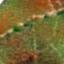

In [1]:
import os
from keras.preprocessing import image

base_dir = '/tf/data'

# Directories for training and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

#Directory with training coffee pictures
train_coffee_dir = os.path.join(train_dir, 'coffee')
# Directory with training noncoffee pictures
train_noncoffee_dir = os.path.join(train_dir, 'noncoffee')

#Directory with validation coffee pictures
validation_coffee_dir = os.path.join(validation_dir, 'coffee')
# Directory with validation noncoffee pictures
validation_noncoffee_dir = os.path.join(validation_dir, 'noncoffee')

# Directory with test coffee pictures
test_coffee_dir = os.path.join(test_dir, 'coffee')
# Directory with test noncoffee pictures
test_noncoffee_dir = os.path.join(test_dir, 'noncoffee')


img = image.load_img(os.path.join(train_coffee_dir, 
                os.listdir(train_coffee_dir)[3]))

img.show()    # To show the image

# Instantiating the convnet

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

From the 2nd edition of the book "Deep Learning with Python", chapter 8 - Instrantiating a small convnet for dogs vs. cats classification

In [4]:
inputs = keras.Input(shape=(img.size[0], img.size[1], 3))
x = layers.Rescaling(1./255)(inputs)        # Rescale to the [0, 1] range
                                            # by dividing by 255.
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
#x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [5]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                       

In [6]:
model.compile(loss="binary_crossentropy",
                optimizer="rmsprop",
                metrics=["accuracy"])

# Dataset from directories

In [7]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
            train_dir,
            image_size = img.size,
            batch_size = 32)
validation_dataset = image_dataset_from_directory(
            validation_dir,
            image_size = img.size,
            batch_size = 32)
test_dataset = image_dataset_from_directory(
            test_dir,
            image_size = img.size,
            batch_size = 32)

Found 1802 files belonging to 2 classes.
Found 598 files belonging to 2 classes.
Found 476 files belonging to 2 classes.


# Training

In [8]:
history = model.fit(
            train_dataset,
            epochs=30,
            validation_data=validation_dataset)

Epoch 1/30
57/57 [==============================] - 2s 9ms/step - loss: 0.6225 - accuracy: 0.6770 - val_loss: 0.5804 - val_accuracy: 0.7007
Epoch 2/30
57/57 [==============================] - 0s 6ms/step - loss: 0.5469 - accuracy: 0.7347 - val_loss: 0.9465 - val_accuracy: 0.6237
Epoch 3/30
57/57 [==============================] - 0s 6ms/step - loss: 0.4939 - accuracy: 0.7564 - val_loss: 0.4465 - val_accuracy: 0.7776
Epoch 4/30
57/57 [==============================] - 0s 6ms/step - loss: 0.4668 - accuracy: 0.7886 - val_loss: 0.4833 - val_accuracy: 0.7776
Epoch 5/30
57/57 [==============================] - 0s 6ms/step - loss: 0.4171 - accuracy: 0.8097 - val_loss: 0.7262 - val_accuracy: 0.6973
Epoch 6/30
57/57 [==============================] - 0s 6ms/step - loss: 0.4032 - accuracy: 0.8219 - val_loss: 0.4517 - val_accuracy: 0.7759
Epoch 7/30
57/57 [==============================] - 0s 6ms/step - loss: 0.3634 - accuracy: 0.8424 - val_loss: 0.4017 - val_accuracy: 0.8445
Epoch 8/30
57/57 [==

# Plot

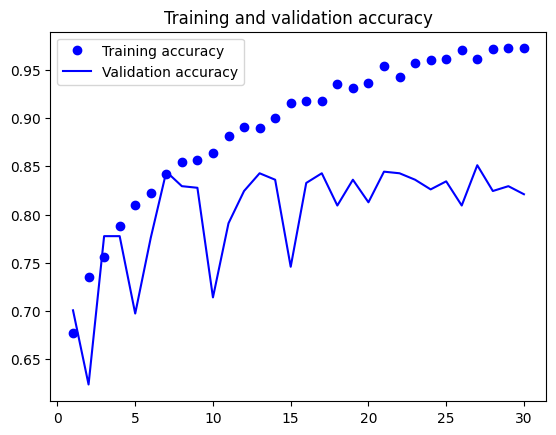

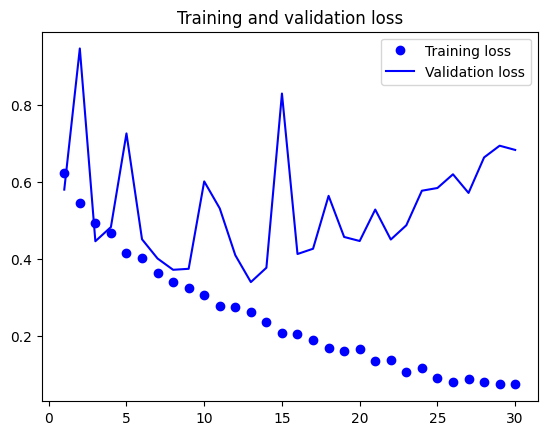

In [9]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

# Evaluation

In [10]:
loss, acc = model.evaluate(validation_dataset, verbose=2)
print('Model evaluation -> accuracy ',format(100 * acc))

19/19 - 0s - loss: 0.6834 - accuracy: 0.8211 - 69ms/epoch - 4ms/step
Model evaluation -> accuracy  82.10702538490295


# Confusion matrix

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix

In [31]:
# features and labels of all 598 images of the validation dataset
all_features = []
all_labels = []

# Happens 18 times (598/32=18,..)
# imagesInValidation/batchsize
for images, labels in validation_dataset: 
    features = model.predict(images)
    all_features.append(features)
    all_labels.append(labels)
     
    # Numpy concatenate: Join a sequence of arrays along an existing axis
    val_features = np.concatenate(all_features)
    for i in range(val_features.size):
        val_features[i] = 1 if val_features[i] > 0.5 else 0
    val_labels = np.concatenate(all_labels)

In [34]:
conf_matrix = confusion_matrix(y_true=val_labels, y_pred=val_features)

array([[229,  69],
       [ 38, 262]])

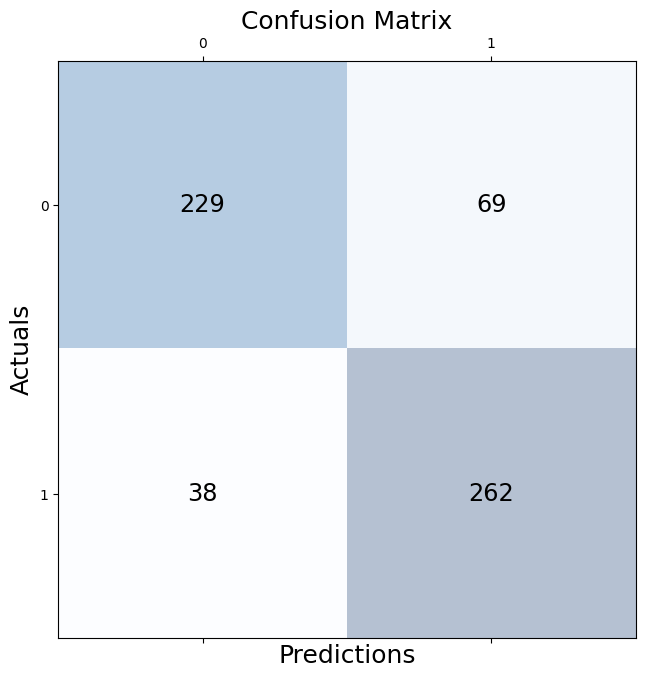

In [33]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [41]:
print("Confusion matrix accuracy: %", np.trace(conf_matrix)/np.sum(conf_matrix)*100)

Confusion matrix accuracy: % 82.10702341137124
